In [3]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Read in data
df_bin = pd.read_csv('../../data/example/02_gj3861/GJ_3861_rv_bin.csv')
df_bin

,files,bjd,rv1,rv1_err,rv2,rv2_err
0,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459303e+06,0.342676,0.052973,-35.143820,0.048297
1,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459303e+06,0.472920,0.081312,-35.187018,0.082219
2,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459649e+06,-5.448489,0.083038,-27.686371,0.212656
3,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459649e+06,-5.549192,0.070987,-27.617259,0.202866
4,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459663e+06,-0.094199,0.066236,-34.588890,0.010042
5,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.459663e+06,-0.083803,0.076403,-34.505755,0.081224
6,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.460310e+06,-22.017413,0.037417,-6.113102,0.162771
7,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.460310e+06,-21.887869,0.083399,-6.283205,0.165092
8,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.460335e+06,-29.020596,0.068224,3.112041,0.092464
9,/Users/gks/Dropbox/mypylib/notebooks/GIT/radio...,2.460340e+06,-19.393917,0.025056,-9.471360,0.043817


In [6]:
from importlib import reload

# import our package
import rvbinfit
reload(rvbinfit)

<module 'rvbinfit' from '/Users/gks/anaconda3/envs/py311/lib/python3.11/site-packages/rvbinfit/__init__.py'>

In [9]:
f = '../../data/example/02_gj3861/gj3861_ecc_jitter.txt'
inp = {}
inp['time']    = df_bin.bjd.values
inp['rv1']     = df_bin.rv1.values
inp['rv1_err'] = df_bin.rv1_err.values
inp['rv2']     = df_bin.rv2.values
inp['rv2_err'] = df_bin.rv2_err.values

L = rvbinfit.rvbinfit.LPFunction2(inp,f)
TF = rvbinfit.rvbinfit.RVBinFit(L)

Reading in priorfile from ../../data/example/02_gj3861/gj3861_ecc_jitter.txt
  prior          arg1          arg2      label description priortype  fixed
0    UP  2.460310e+06  2.460325e+06      tp_p1       tp_p1     model  False
1    NP  1.486154e+01  1.000000e-01       P_p1        P_p1     model  False
2    UP  0.000000e+00  9.500000e-01     ecc_p1      ecc_p1     model  False
3    UP  0.000000e+00  3.600000e+02   omega_p1    omega_p1     model  False
4    UP  0.000000e+00  1.000000e+02       K_p1        K_p1     model  False
5    UP  0.000000e+00  2.000000e+00          q           q     model  False
6    UP -1.200000e+02  1.200000e+02      gamma       gamma     model  False
7    UP  0.000000e+00  2.000000e+01  sigma_rv1   sigma_rv1     model  False
8    UP  0.000000e+00  2.000000e+01  sigma_rv2   sigma_rv2     model  False


In [10]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      tp_p1  2.460317e+06  2.460310e+06  2.460325e+06  2.460325e+06    -7.284140
1       P_p1  1.486154e+01  1.436154e+01  1.536154e+01  1.484167e+01     0.019874
2     ecc_p1  4.750000e-01  0.000000e+00  9.500000e-01  1.200183e-01     0.354982
3   omega_p1  1.800000e+02  0.000000e+00  3.600000e+02  2.500837e+02   -70.083653
4       K_p1  5.000000e+01  0.000000e+00  1.000000e+02  2.226025e+01    27.739753
5          q  1.000000e+00  0.000000e+00  2.000000e+00  7.606126e-01     0.239387
6      gamma  0.000000e+00 -1.200000e+02  1.200000e+02 -1.499839e+01    14.998386
7  sigma_rv1  1.000000e+01  0.000000e+00  2.000000e+01  3.284128e-01     9.671587
8  sigma_rv2  1.000000e+01  0.000000e+00  2.000000e+01  3.292254e-01     9.670775
LogPost value: -23.241957093926295
LnL value: 0.6971750946602242
Log priors -23.93913218858652


Text(0, 0.5, 'Res [km/s]')

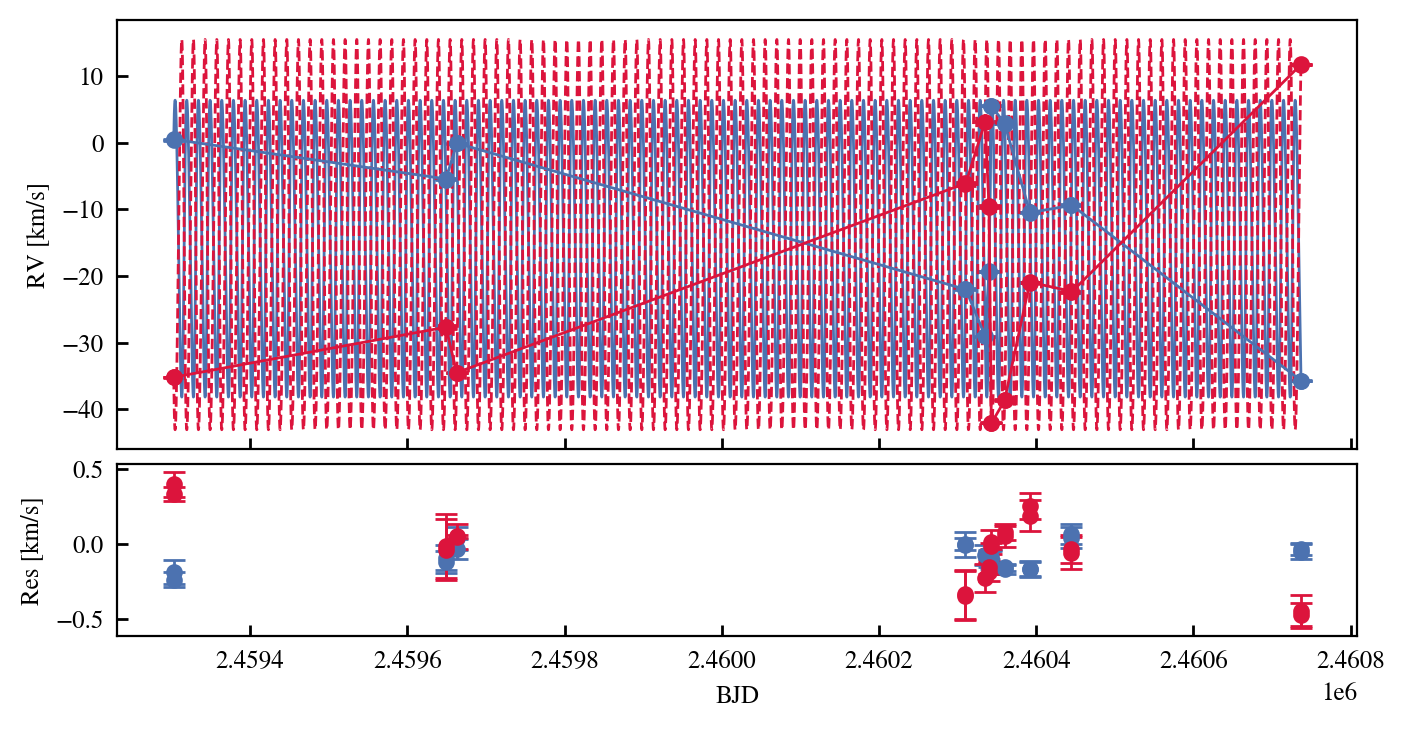

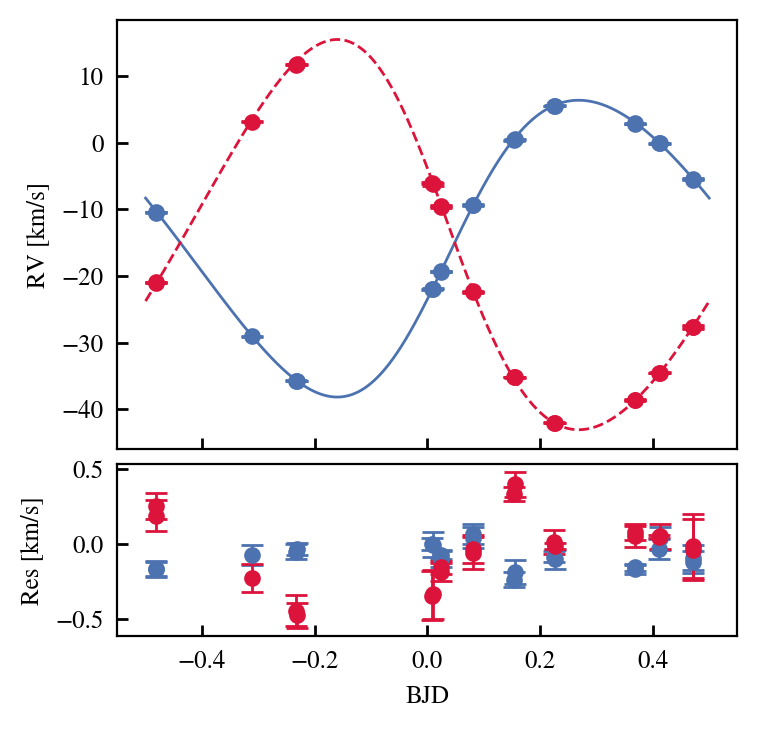

In [14]:
from matplotlib import rcParams

CP = ['blue','crimson']
CP = rvbinfit.rvutils.CP
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

pv = TF.min_pv

P  = TF.lpf.get_jump_parameter_value(pv,'P_p1')
tp = TF.lpf.get_jump_parameter_value(pv,'tp_p1')


tt = np.linspace(TF.lpf.data['time'][0],TF.lpf.data['time'][-1],40000)
rv1, rv2 = TF.lpf.compute_total_model(pv,tt)

rv1_obs, rv2_obs = TF.lpf.compute_total_model(pv,TF.lpf.data['time'])

res1 = TF.lpf.data['rv1'] - rv1_obs
res2 = TF.lpf.data['rv2'] - rv2_obs

fig, (ax,bx) = plt.subplots(dpi=200,figsize=(8,4),nrows=2,sharex=True,gridspec_kw={'height_ratios':[5,2]})
ax.errorbar(TF.lpf.data['time'],TF.lpf.data['rv1'],TF.lpf.data['rv1_err'],marker='o',elinewidth=1,capsize=4,lw=1,mew=1,color=CP[0])
ax.errorbar(TF.lpf.data['time'],TF.lpf.data['rv2'],TF.lpf.data['rv2_err'],marker='o',elinewidth=1,capsize=4,lw=1,mew=1,color='crimson')
ax.plot(tt,rv1,color=CP[0],ls="-",lw=1)
ax.plot(tt,rv2,color='crimson',ls="--",lw=1)

bx.errorbar(TF.lpf.data['time'],res1,TF.lpf.data['rv1_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0])
bx.errorbar(TF.lpf.data['time'],res2,TF.lpf.data['rv2_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson')

fig.subplots_adjust(hspace=0.05)
bx.set_xlabel('BJD')
ax.set_ylabel('RV [km/s]')
bx.set_ylabel('Res [km/s]')

# PHASES
df_bin1 = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=TF.lpf.data['rv1'],rvs_err=TF.lpf.data['rv1_err'])
df_bin2 = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=TF.lpf.data['rv2'],rvs_err=TF.lpf.data['rv2_err'])

df_bin1m = rvbinfit.rvutils.get_phases_sorted(tt,P,tp,rvs=rv1)
df_bin2m = rvbinfit.rvutils.get_phases_sorted(tt,P,tp,rvs=rv2)

df_bin1res = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=res1,rvs_err=TF.lpf.data['rv1_err'])
df_bin2res = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=res2,rvs_err=TF.lpf.data['rv2_err'])

fig, (ax,bx) = plt.subplots(dpi=200,figsize=(4,4),nrows=2,sharex=True,gridspec_kw={'height_ratios':[5,2]})
ax.errorbar(df_bin1.phases.values,df_bin1.rvs.values,df_bin1.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0])
ax.errorbar(df_bin2.phases.values,df_bin2.rvs.values,df_bin2.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson')

ax.plot(df_bin1m.phases.values,df_bin1m.rvs.values,color=CP[0],ls="-",lw=1)
ax.plot(df_bin2m.phases.values,df_bin2m.rvs.values,color='crimson',ls="--",lw=1)

bx.errorbar(df_bin1res.phases.values,df_bin1res.rvs.values,df_bin1res.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0])
bx.errorbar(df_bin2res.phases.values,df_bin2res.rvs.values,df_bin2res.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson')

fig.subplots_adjust(hspace=0.05)

bx.set_xlabel('BJD')
ax.set_ylabel('RV [km/s]')
bx.set_ylabel('Res [km/s]')

In [15]:
f = '../../data/example/02_gj3861/gj3861_ecc_jitter.txt'
inp = {}
inp['time']    = df_bin.bjd.values
inp['rv1']     = df_bin.rv1.values
inp['rv1_err'] = df_bin.rv1_err.values
inp['rv2']     = df_bin.rv2.values
inp['rv2_err'] = df_bin.rv2_err.values

L = rvbinfit.rvbinfit.LPFunction2(inp,f)
TF = rvbinfit.rvbinfit.RVBinFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=4000,npop=200)

Reading in priorfile from ../../data/example/02_gj3861/gj3861_ecc_jitter.txt
  prior          arg1          arg2      label description priortype  fixed
0    UP  2.460310e+06  2.460325e+06      tp_p1       tp_p1     model  False
1    NP  1.486154e+01  1.000000e-01       P_p1        P_p1     model  False
2    UP  0.000000e+00  9.500000e-01     ecc_p1      ecc_p1     model  False
3    UP  0.000000e+00  3.600000e+02   omega_p1    omega_p1     model  False
4    UP  0.000000e+00  1.000000e+02       K_p1        K_p1     model  False
5    UP  0.000000e+00  2.000000e+00          q           q     model  False
6    UP -1.200000e+02  1.200000e+02      gamma       gamma     model  False
7    UP  0.000000e+00  2.000000e+01  sigma_rv1   sigma_rv1     model  False
8    UP  0.000000e+00  2.000000e+01  sigma_rv2   sigma_rv2     model  False
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      tp_p1  2.460

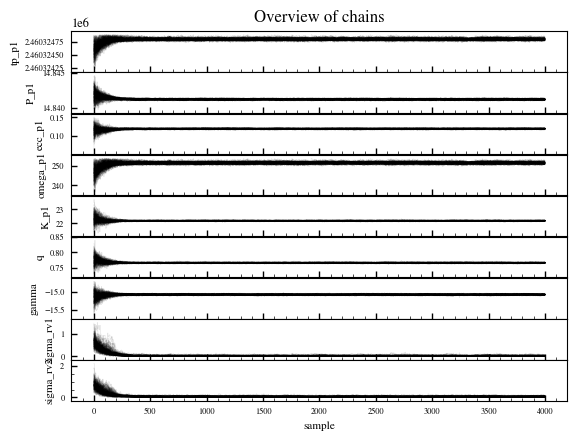

In [16]:
rvbinfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

In [17]:
# Make flatchain and posteriors
burnin_index = 2000
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,tp_p1,P_p1,ecc_p1,omega_p1,K_p1,q,gamma,sigma_rv1,sigma_rv2
0,2.460325e+06,14.841207,0.120399,251.407612,22.193531,0.765098,-15.067130,0.013694,0.089347
1,2.460325e+06,14.841104,0.121832,251.325897,22.207797,0.765457,-15.064967,0.014370,0.125960
2,2.460325e+06,14.841109,0.121627,251.357769,22.207849,0.765552,-15.066034,0.013942,0.122783
3,2.460325e+06,14.841109,0.121627,251.357769,22.207849,0.765552,-15.066034,0.013942,0.122783
4,2.460325e+06,14.841109,0.121627,251.357769,22.207849,0.765552,-15.066034,0.013942,0.122783
...,...,...,...,...,...,...,...,...,...
399995,2.460325e+06,14.841266,0.120077,250.723363,22.214589,0.765989,-15.098101,0.012847,0.107454
399996,2.460325e+06,14.841297,0.119728,250.476083,22.209751,0.764307,-15.097297,0.000966,0.125437
399997,2.460325e+06,14.841297,0.119728,250.476083,22.209751,0.764307,-15.097297,0.000966,0.125437
399998,2.460325e+06,14.841297,0.119728,250.476083,22.209751,0.764307,-15.097297,0.000966,0.125437


In [18]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rvbinfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.03122158, 1.03312702, 1.02717944, 1.03134965, 1.02868823,
       1.03269257, 1.02709766, 1.03095869, 1.03046263])

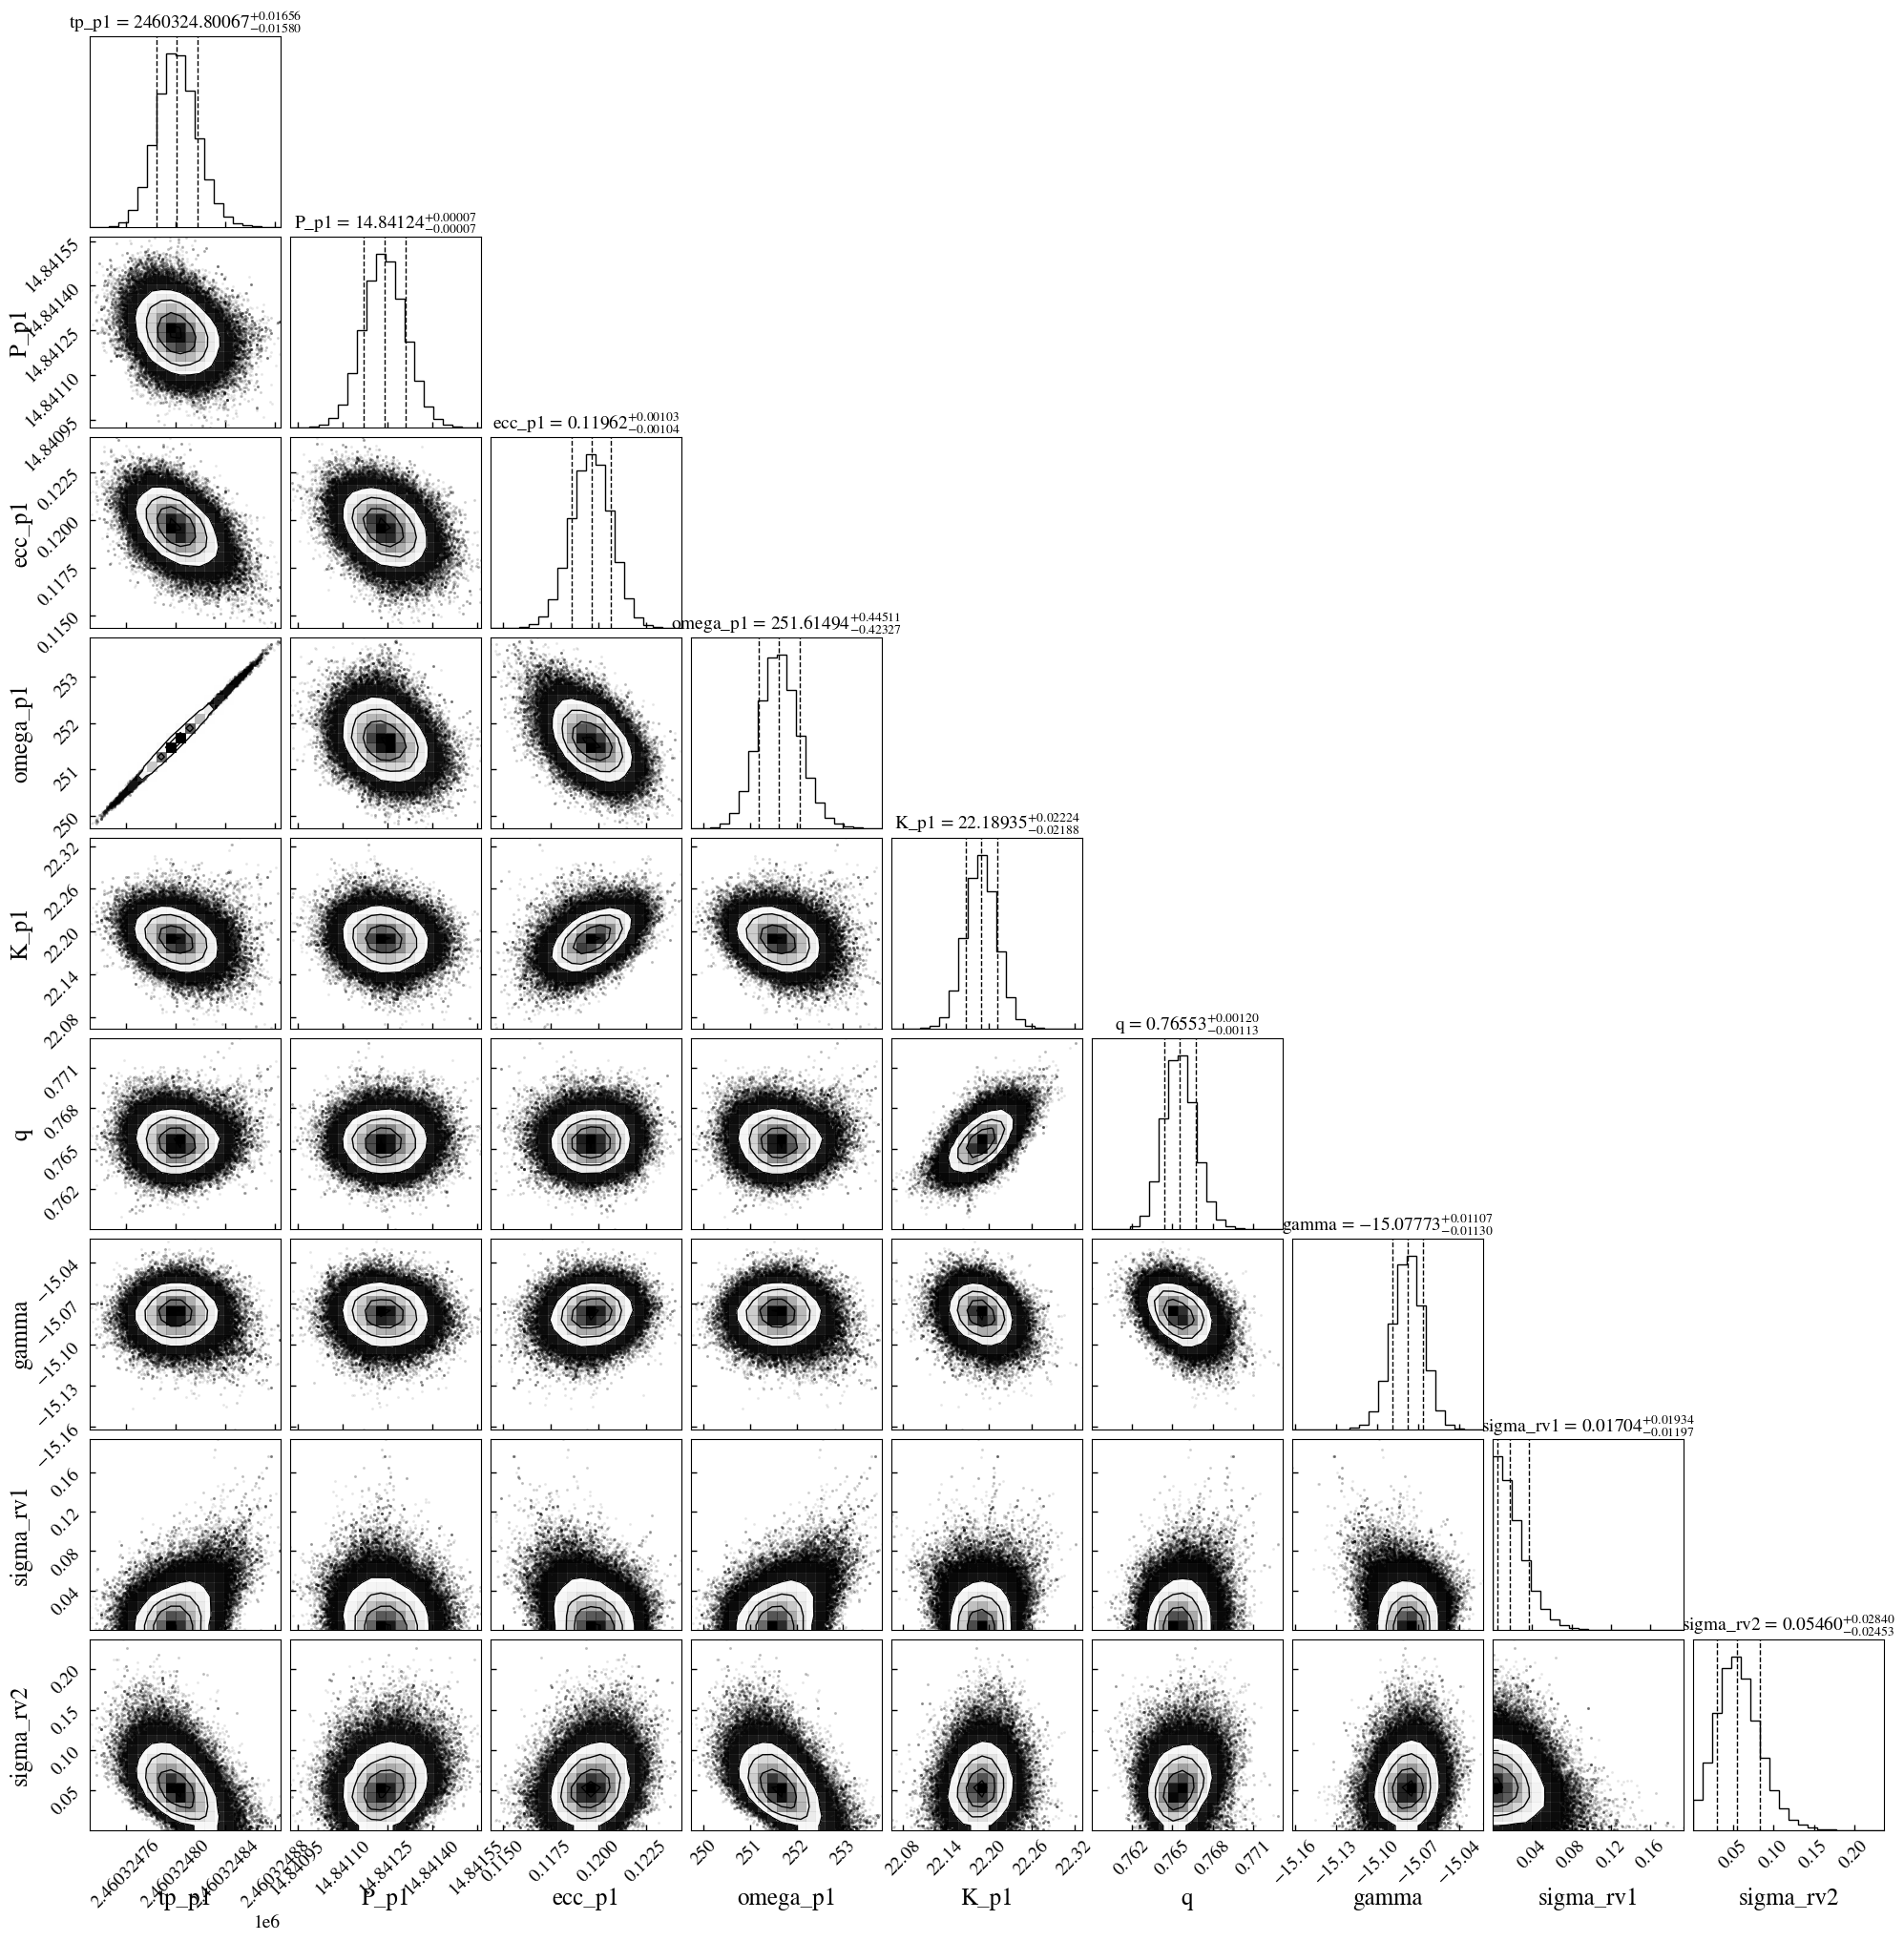

In [19]:
# Plot corner plot
fig = rvbinfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.5f',xlabcord=(0.5, -0.2))

In [20]:
#flatchain = TF.sampler.chain[:,::2000,:].reshape((-1,len(TF.lpf.ps_vary.priors)))
#df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)

# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.460325e+06,0.015796,0.016562,$2460324.801_{-0.016}^{+0.017}$,tp_p1,tp_p1
0,1.484124e+01,0.000069,0.000072,$14.84124_{-0.00007}^{+0.00007}$,P_p1,P_p1
0,1.196229e-01,0.001044,0.001034,$0.1196_{-0.0010}^{+0.0010}$,ecc_p1,ecc_p1
0,2.516149e+02,0.423275,0.445107,$251.61_{-0.42}^{+0.45}$,omega_p1,omega_p1
0,2.218935e+01,0.021878,0.022239,$22.189_{-0.022}^{+0.022}$,K_p1,K_p1
0,7.655310e-01,0.001133,0.001198,$0.7655_{-0.0011}^{+0.0012}$,q,q
0,-1.507773e+01,0.011303,0.011069,$-15.078_{-0.011}^{+0.011}$,gamma,gamma
0,1.703819e-02,0.011971,0.019341,$0.017_{-0.012}^{+0.019}$,sigma_rv1,sigma_rv1
0,5.460135e-02,0.024528,0.028402,$0.055_{-0.025}^{+0.028}$,sigma_rv2,sigma_rv2


In [21]:
print(df_medvals[['Labels','values']].to_latex(index=False))

\begin{tabular}{ll}
\toprule
Labels & values \\
\midrule
tp_p1 & $2460324.801_{-0.016}^{+0.017}$ \\
P_p1 & $14.84124_{-0.00007}^{+0.00007}$ \\
ecc_p1 & $0.1196_{-0.0010}^{+0.0010}$ \\
omega_p1 & $251.61_{-0.42}^{+0.45}$ \\
K_p1 & $22.189_{-0.022}^{+0.022}$ \\
q & $0.7655_{-0.0011}^{+0.0012}$ \\
gamma & $-15.078_{-0.011}^{+0.011}$ \\
sigma_rv1 & $0.017_{-0.012}^{+0.019}$ \\
sigma_rv2 & $0.055_{-0.025}^{+0.028}$ \\
\bottomrule
\end{tabular}



(-50.0, 30.0)

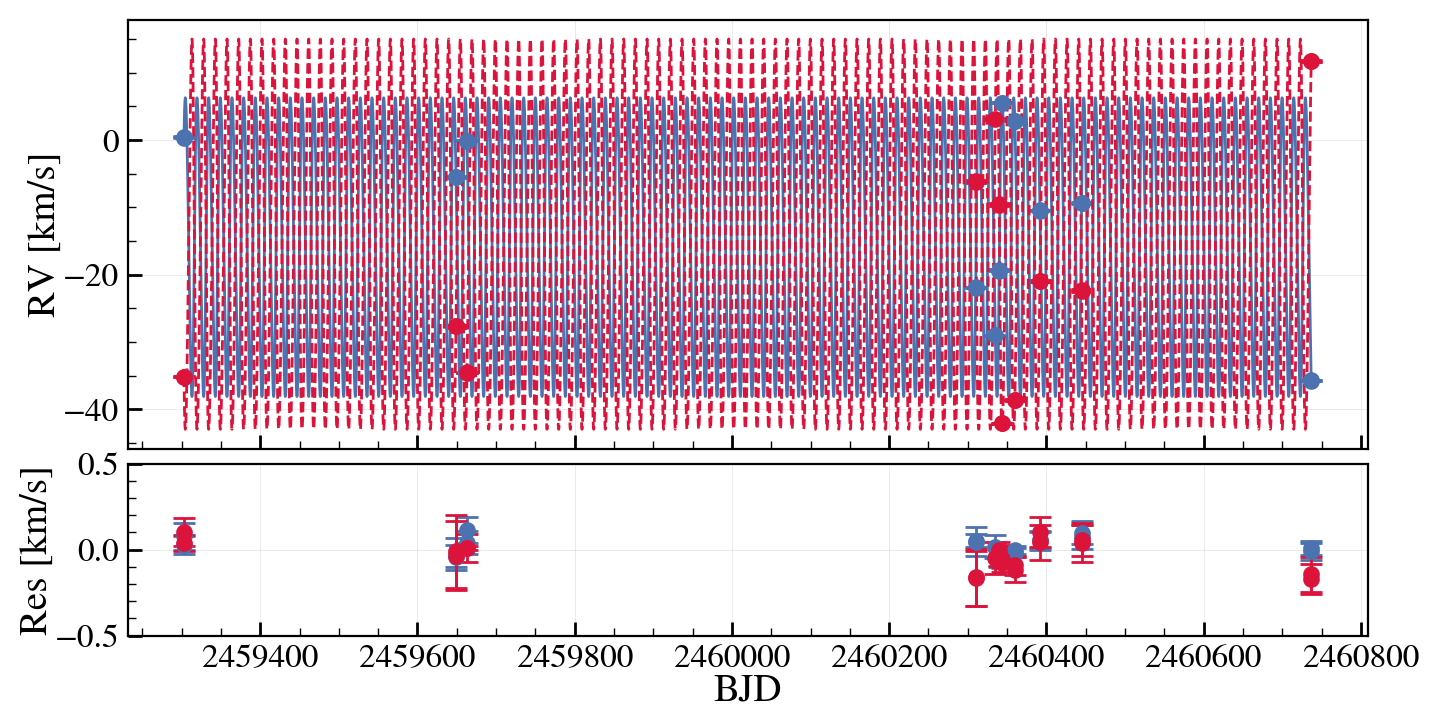

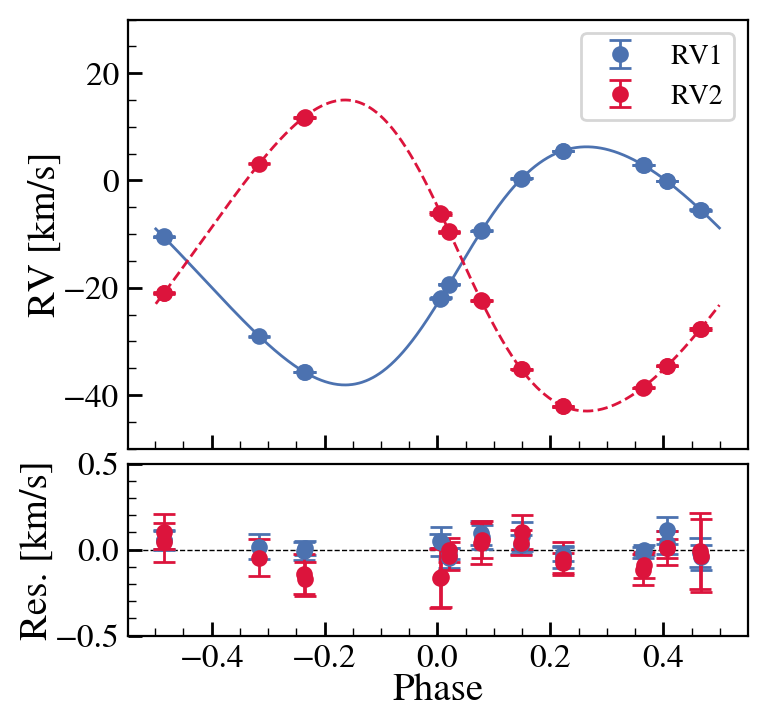

In [23]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=5
rcParams['xtick.minor.width']=0.5
rcParams['xtick.minor.size']=3
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=5
rcParams['ytick.minor.width']=0.5
rcParams['ytick.minor.size']=3
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['axes.formatter.limits'] = -10,10

P  = df_medvals.medvals.values[df_medvals.Labels=='P_p1'][0]
q = df_medvals.medvals.values[df_medvals.Labels=='q'][0]
tp = df_medvals.medvals.values[df_medvals.Labels=='tp_p1'][0]
gamma = df_medvals.medvals.values[df_medvals.Labels=='gamma'][0]
s1 = df_medvals.medvals.values[df_medvals.Labels=='sigma_rv1'][0]
s2 = df_medvals.medvals.values[df_medvals.Labels=='sigma_rv2'][0]

flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
pv_50 = np.percentile(flatchain,[50],axis=0)[0]

tt = np.linspace(TF.lpf.data['time'][0],TF.lpf.data['time'][-1],40000)
rv1, rv2 = TF.lpf.compute_total_model(pv_50,tt)
rv1_obs, rv2_obs = TF.lpf.compute_total_model(pv_50,TF.lpf.data['time'])

res1 = TF.lpf.data['rv1'] - rv1_obs
res2 = TF.lpf.data['rv2'] - rv2_obs

fig, (ax,bx) = plt.subplots(dpi=200,figsize=(8,4),nrows=2,sharex=True,gridspec_kw={'height_ratios':[5,2]})
ax.errorbar(TF.lpf.data['time'],TF.lpf.data['rv1'],TF.lpf.data['rv1_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0],label='RV1')
ax.errorbar(TF.lpf.data['time'],TF.lpf.data['rv2'],TF.lpf.data['rv2_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson',label='RV2')
ax.plot(tt,rv1,color=CP[0],ls="-",lw=1)
ax.plot(tt,rv2,color='crimson',ls="--",lw=1)

bx.errorbar(TF.lpf.data['time'],res1,TF.lpf.data['rv1_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0])
bx.errorbar(TF.lpf.data['time'],res2,TF.lpf.data['rv2_err'],marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson')

fig.subplots_adjust(hspace=0.05)
#ax.set_title('GJ 3861, Radio M star, HPF, q={:0.3f}'.format(q),fontsize=14)

bx.set_xlabel('BJD',labelpad=0,fontsize=14)
ax.set_ylabel('RV [km/s]',labelpad=0,fontsize=14)
bx.set_ylabel('Res [km/s]',labelpad=0,fontsize=14)
bx.set_ylim(-0.5,0.5)

for xx in [ax,bx]:
    rvbinfit.rvutils.ax_apply_settings(xx)

# PHASES
df_bin1 = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=TF.lpf.data['rv1'],rvs_err=TF.lpf.data['rv1_err'])
df_bin2 = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=TF.lpf.data['rv2'],rvs_err=TF.lpf.data['rv2_err'])

df_bin1m = rvbinfit.rvutils.get_phases_sorted(tt,P,tp,rvs=rv1)
df_bin2m = rvbinfit.rvutils.get_phases_sorted(tt,P,tp,rvs=rv2)

df_bin1res = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=res1,rvs_err=TF.lpf.data['rv1_err'])
df_bin2res = rvbinfit.rvutils.get_phases_sorted(TF.lpf.data['time'],P,tp,rvs=res2,rvs_err=TF.lpf.data['rv2_err'])

fig, (ax,bx) = plt.subplots(dpi=200,figsize=(4,4),nrows=2,sharex=True,gridspec_kw={'height_ratios':[5,2]})
ax.errorbar(df_bin1.phases.values,df_bin1.rvs.values,df_bin1.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0],label='RV1')
ax.errorbar(df_bin2.phases.values,df_bin2.rvs.values,df_bin2.rvs_err.values,marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson',label='RV2')

ax.plot(df_bin1m.phases.values,df_bin1m.rvs.values,color=CP[0],ls="-",lw=1)
ax.plot(df_bin2m.phases.values,df_bin2m.rvs.values,color='crimson',ls="--",lw=1)

bx.errorbar(df_bin1res.phases.values,df_bin1res.rvs.values,np.sqrt(df_bin1res.rvs_err.values**2 + s1**2),marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=CP[0])
bx.errorbar(df_bin2res.phases.values,df_bin2res.rvs.values,np.sqrt(df_bin2res.rvs_err.values**2 + s2**2),marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color='crimson')

for xx in [ax,bx]:
    rvbinfit.rvutils.ax_apply_settings(xx)
    xx.grid(lw=0)

fig.subplots_adjust(hspace=0.05)
bx.axhline(0,color='k',lw=0.5,ls='--',zorder=-10)
#ax.axhline(gamma,color='k',lw=0.5,ls='--',zorder=-10,label='$\gamma={:0.2f}$km/s'.format(gamma))
ax.legend(loc='upper right',fontsize=10)

bx.set_xlabel('Phase',labelpad=0,fontsize=14)
ax.set_ylabel('RV [km/s]',labelpad=0,fontsize=14)
bx.set_ylabel('Res. [km/s]',labelpad=0,fontsize=14)
bx.set_ylim(-0.5,0.5)
ax.set_ylim(-50,30)
#ax.set_title('GJ 3861, Radio M star, HPF, q={:0.3f}'.format(q),fontsize=14)